# Part I - (2018-2019 FordGoBike Data Visualization)
## by David Onwachukwu

### Table of Contents

- [Introduction](#intro)

- [Preliminary Wrangling](#prelim)

- [Data Gathering](#data-gathering)

- [Assessing Data](#assesing-data)
  - [Visual Assessment](#visual-assessment)

  - [Programmatic Assessment](#programmatic-assessment)

- [Data Cleaning](#cleaning)

- [Univariate Exploration](#univariate)

- [Bivariate Explorationn](#bivariate)

- [Multivariate Exploration](#multivariate)

- [Summary](#summary)

- [Sources](#sources)





## Introduction
> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. 

Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. 

The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.

 People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme = 'solarizedl')
import datetime
import geopy.distance
import warnings
import glob
import os


warnings.filterwarnings('ignore')
%matplotlib inline

## Data Gathering

### Load the datasets

I downloaded the datasets from the [FordGoBike website](https://s3.amazonaws.com/baywheels-data/index.html)

I then used the glob and os modules to store, load, and combine the files into one new file, gobike.csv:

In [3]:
path = '/home/linuxdavid/Udacity Projects/Communicate Data Findings/Data'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('gobike.csv', index = False)

In [4]:
gobike = pd.read_csv('gobike.csv')

## Assesing Data

## Visual Assessment

In [5]:
gobike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733371,645,2018-05-01 00:07:24.1290,2018-05-01 00:18:09.6860,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,2405,Subscriber,1979.0,Male,No
2733372,135,2018-05-01 00:15:53.9830,2018-05-01 00:18:09.5370,244.0,Shattuck Ave at Hearst Ave,37.873792,-122.268618,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,2627,Subscriber,1986.0,Female,No
2733373,316,2018-05-01 00:10:04.1110,2018-05-01 00:15:20.9810,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,45.0,5th St at Howard St,37.781752,-122.405127,2664,Subscriber,1992.0,Male,No
2733374,183,2018-05-01 00:12:01.7090,2018-05-01 00:15:05.4410,243.0,Bancroft Way at College Ave,37.869360,-122.254337,267.0,Derby St at College Ave,37.861804,-122.253569,1236,Subscriber,1995.0,Male,Yes


## Programmatic Assessment

In [6]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No


In [7]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733376 entries, 0 to 2733375
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 333.7+ MB


In [8]:
# check for duplicates
gobike.duplicated().sum()

0

In [9]:
gobike.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12319
start_station_name          12319
start_station_latitude          0
start_station_longitude         0
end_station_id              12319
end_station_name            12319
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          980373
member_gender              980022
bike_share_for_all_trip         0
dtype: int64

In [10]:
# check % of missing values in all columns
# any column that has over 50% missing values will be dropped
# otherwise, just the rowas with the missing values will be dropped
gobike.isnull().sum()/gobike.shape[0]*100

duration_sec                0.000000
start_time                  0.000000
end_time                    0.000000
start_station_id            0.450688
start_station_name          0.450688
start_station_latitude      0.000000
start_station_longitude     0.000000
end_station_id              0.450688
end_station_name            0.450688
end_station_latitude        0.000000
end_station_longitude       0.000000
bike_id                     0.000000
user_type                   0.000000
member_birth_year          35.866745
member_gender              35.853904
bike_share_for_all_trip     0.000000
dtype: float64

In [11]:
gobike.member_gender.value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [12]:
gobike.user_type.value_counts()

Subscriber    2331475
Customer       401901
Name: user_type, dtype: int64

In [13]:
gobike.bike_share_for_all_trip.value_counts()

No     2495844
Yes     237532
Name: bike_share_for_all_trip, dtype: int64

After gathering and assessing the data, the following quality issues were detected;

* Start_time and end_time should be converted to datetime

* start_station, end_station and bike ID's should be converted to object.

* user_type, member_gender and bike_share_for_all to category.

* member_birth_year should be converted to int from float.

* Missing values in 6 columns.

## Cleaning

In [14]:
# make a copy of the original data
gobike_clean = gobike.copy()
gobike_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975.0,Male,Yes
1,60358,2018-06-30 21:48:19.5570,2018-07-01 14:34:18.1000,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,653,Customer,NaN,NaN,No
2,63654,2018-06-30 20:26:53.0310,2018-07-01 14:07:47.2320,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962.0,Female,No
3,50508,2018-06-30 20:29:59.8130,2018-07-01 10:31:48.2500,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992.0,Male,No
4,51697,2018-06-30 18:24:56.6960,2018-07-01 08:46:33.7390,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989.0,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733371,645,2018-05-01 00:07:24.1290,2018-05-01 00:18:09.6860,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,2405,Subscriber,1979.0,Male,No
2733372,135,2018-05-01 00:15:53.9830,2018-05-01 00:18:09.5370,244.0,Shattuck Ave at Hearst Ave,37.873792,-122.268618,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,2627,Subscriber,1986.0,Female,No
2733373,316,2018-05-01 00:10:04.1110,2018-05-01 00:15:20.9810,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,45.0,5th St at Howard St,37.781752,-122.405127,2664,Subscriber,1992.0,Male,No
2733374,183,2018-05-01 00:12:01.7090,2018-05-01 00:15:05.4410,243.0,Bancroft Way at College Ave,37.869360,-122.254337,267.0,Derby St at College Ave,37.861804,-122.253569,1236,Subscriber,1995.0,Male,Yes


### Define: Drop rows with missing values in start and end station Ids and name, and member age and birth year
            

### Code

In [15]:
gobike_clean = gobike_clean.dropna()

### Test

In [16]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 2733374
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 225.9+ MB


### Define: Erroneous Data Types

## Code

In [17]:
# Convert start and end time columns to datetime
gobike_clean.start_time = gobike_clean.start_time.astype('datetime64')
gobike_clean.end_time = gobike_clean.end_time.astype('datetime64')

In [18]:
# Convert bike_id, start_station_id, and end_station_id to object
gobike_clean.start_station_id = gobike_clean.start_station_id.astype(object)
gobike_clean.end_station_id = gobike_clean.end_station_id.astype(object)
gobike_clean.bike_id = gobike_clean.bike_id.astype(object)

In [19]:
#  user_type, member_gender and bike_share_for_all to category
gobike_clean.user_type = gobike_clean.user_type.astype('category')
gobike_clean.member_gender = gobike_clean.member_gender.astype('category')
gobike_clean.bike_share_for_all_trip = gobike_clean.bike_share_for_all_trip.astype('category')

## Test

In [20]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 2733374
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memor

### Define: Create columns for start_month, weekday, start and end time hour, duration in minutes

### Code

In [21]:
# for duration minutes
gobike_clean['duration_minute'] = gobike_clean['duration_sec']/60
gobike_clean['duration_minute'] = gobike_clean['duration_minute'].astype(int)

In [22]:
# Start time month (January - December)
gobike_clean['start_time_month'] = gobike_clean['start_time'].dt.strftime('%B')
gobike_clean.start_time_month.value_counts()

October      191485
July         183694
June         181405
August       178375
September    174768
May          167376
November     128564
December     126162
April        121791
March        102347
February      98626
January       86963
Name: start_time_month, dtype: int64

In [23]:
# for start_time weekday
gobike_clean['start_time_weekday'] = gobike_clean['start_time'].dt.strftime('%a')

In [24]:
# start and end time hours
gobike_clean['start_time_hour'] = gobike_clean['start_time'].dt.hour 
gobike_clean['end_time_hour'] = gobike_clean['end_time'].dt.hour 

## Test

In [25]:
gobike_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_time_month,start_time_weekday,start_time_hour,end_time_hour
277168,559,2018-12-11 21:15:51.275,2018-12-11 21:25:10.850,308.0,San Pedro Square,37.336802,-121.894090,289.0,5th St at Taylor St,37.351017,...,2575,Subscriber,1973.0,Male,No,9,December,Tue,21,21
649747,803,2018-10-17 09:10:27.774,2018-10-17 09:23:50.972,116.0,Mississippi St at 17th St,37.764802,-122.394771,58.0,Market St at 10th St,37.776619,...,1981,Subscriber,1984.0,Male,No,13,October,Wed,9,9
1542104,303,2018-03-20 17:44:49.643,2018-03-20 17:49:53.625,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,1665,Subscriber,1968.0,Male,No,5,March,Tue,17,17
133043,1447,2018-06-11 10:24:49.451,2018-06-11 10:48:57.232,130.0,22nd St Caltrain Station,37.757369,-122.392057,24.0,Spear St at Folsom St,37.789677,...,627,Customer,1975.0,Female,No,24,June,Mon,10,10
741179,359,2018-10-03 09:15:28.302,2018-10-03 09:21:27.865,22.0,Howard St at Beale St,37.789756,-122.394643,8.0,The Embarcadero at Vallejo St,37.799953,...,1882,Subscriber,1981.0,Male,No,5,October,Wed,9,9


### Define: Get age of each member by subtracting birth year from 2019

### Code

In [26]:
gobike_clean['member_age'] = 2019 - gobike_clean['member_birth_year']
gobike_clean['member_age'] = gobike_clean['member_age'].astype(int)
gobike_clean['member_birth_year'] = gobike_clean['member_birth_year'].astype(int)

In [27]:
gobike_clean['member_age'].describe()

count    1.741556e+06
mean     3.593921e+01
std      1.045133e+01
min      1.900000e+01
25%      2.800000e+01
50%      3.400000e+01
75%      4.100000e+01
max      1.380000e+02
Name: member_age, dtype: float64

The max age is 141, the column needs to be checked for the presence of outliers.

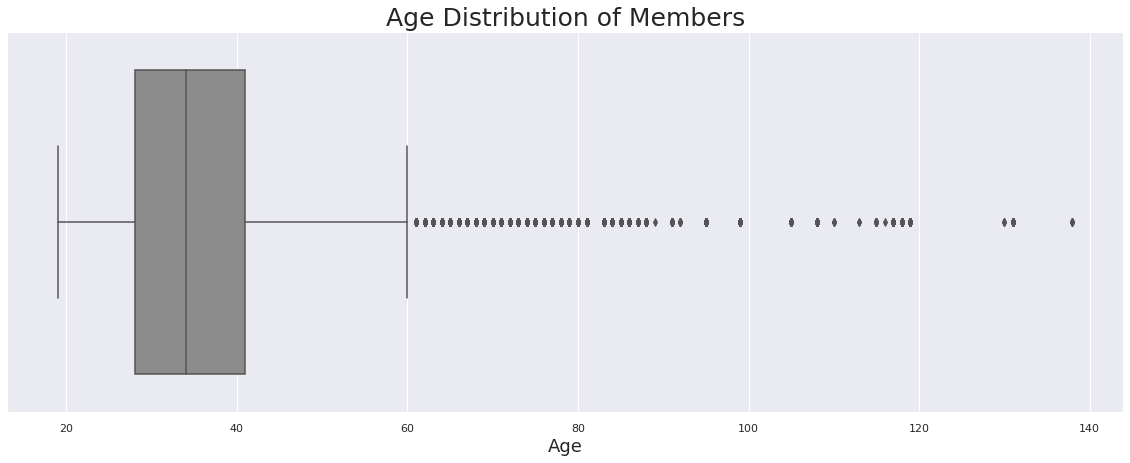

In [28]:
pd.set_option('display.max_columns', None) # Show all dataframe columns.
sb.set(rc={'figure.figsize':(20,7)})
uni_color = sb.color_palette()[7]
ax = sb.boxplot(x=gobike_clean["member_age"], color=uni_color)
ax.set_xlabel('Age', fontsize=18)
ax.set_title("Age Distribution of Members", fontsize=25);


The box plot above shows that the outliers in this column begin really close to the 60 mark, so I will drop all rows with age > 60.

In [29]:
# drop rows with age > 60
gobike_clean.drop(gobike_clean[gobike_clean.member_age > 60].index, inplace=True)

## Test

In [30]:
# maximum age should be 60
gobike_clean.member_age.describe()

count    1.696859e+06
mean     3.511512e+01
std      9.118521e+00
min      1.900000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      6.000000e+01
Name: member_age, dtype: float64

## Define: Split member age into categories

## Code

In [31]:
def category(age):
    if 10<age<=20:
        return '11-20'
    
    elif 20<age<=30:
        return '21-30'  
    
    elif 30<age<=40:
        return '31-40'
    
    elif 40<age<=50:
        return '41-50'
    
    elif 50<age<=60:
        return '51-60'

gobike_clean['age_category'] = gobike_clean['member_age'].apply(category)

### Test

In [32]:
gobike_clean['age_category'].value_counts()

31-40    677083
21-30    582526
41-50    274730
51-60    144260
11-20     18260
Name: age_category, dtype: int64

In [33]:
gobike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_time_month,start_time_weekday,start_time_hour,end_time_hour,member_age,age_category
0,59088,2018-06-30 23:32:44.659,2018-07-01 15:57:33.316,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.431060,2100,Subscriber,1975,Male,Yes,984,June,Sat,23,15,44,41-50
2,63654,2018-06-30 20:26:53.031,2018-07-01 14:07:47.232,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,50.0,2nd St at Townsend St,37.780526,-122.390288,3235,Subscriber,1962,Female,No,1060,June,Sat,20,14,57,51-60
3,50508,2018-06-30 20:29:59.813,2018-07-01 10:31:48.250,58.0,Market St at 10th St,37.776619,-122.417385,88.0,11th St at Bryant St,37.770030,-122.411726,3675,Subscriber,1992,Male,No,841,June,Sat,20,10,27,21-30
4,51697,2018-06-30 18:24:56.696,2018-07-01 08:46:33.739,196.0,Grand Ave at Perkins St,37.808894,-122.256460,272.0,Woolsey St at Sacramento St,37.850578,-122.278175,3232,Customer,1989,Female,No,861,June,Sat,18,8,30,21-30
7,7224,2018-06-30 23:01:00.400,2018-07-01 01:01:24.433,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,779,Subscriber,1989,Male,No,120,June,Sat,23,1,30,21-30


### Define: Create a column for Distance in kilometers

### Code

The Haversine formula calculates the great-circle distance between two points. Start by calculating the change in latitude and longitude, in radians, and input the result into the Haversine formula

In [34]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [35]:
# Using the math on the columns for latitude and longitude
gobike_clean['distance_km'] = gobike_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

## Test

In [36]:
gobike_clean.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_time_month,start_time_weekday,start_time_hour,end_time_hour,member_age,age_category,distance_km
2053635,786,2018-08-01 10:33:37.118,2018-08-01 10:46:43.180,81.0,Berry St at 4th St,37.775880,-122.393170,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,972,Subscriber,1972,Male,No,13,August,Wed,10,10,47,41-50,2.223913
1460315,215,2018-04-10 09:28:34.276,2018-04-10 09:32:09.450,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,3352,Subscriber,1967,Male,No,3,April,Tue,9,9,52,51-60,0.792753
491725,548,2018-01-23 17:56:57.645,2018-01-23 18:06:06.587,181.0,Grand Ave at Webster St,37.811377,-122.265192,215.0,34th St at Telegraph Ave,37.822547,-122.266318,3221,Subscriber,1962,Female,No,9,January,Tue,17,18,57,51-60,1.246053


In [37]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696859 entries, 0 to 2733374
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        int64         
 14  member_gender            category      
 15  bike_share_for_all_trip  category      
 16  duration_minute          int64         
 17  start_time_month         ob

In [38]:
gobike_clean.shape

(1696859, 24)

In [39]:
# save cleaned dataset
gobike_clean.to_csv('fordgobike_master_clean.csv', index = False)

### What is the structure of your dataset?

The fordgobike dataset is a very tidy dataset and just needed minor cleaning on some qulaity issues.It originally had 2196788 rows and 16 columns. After cleaning
 I will be using 1696859 rows and 24 columns for my analysis and visualization.

The column headers (original and new) after the data wrangling process are listed below:
 - Bike ID
   - User Type(Subscriber or customer)
   - Member Birth Year
   - Member Gender 

 - End Station ID
   - End Station Name
   - End Station Latitude
   - End Station Longitude

 - Start Station ID
   -  Start Station Name
   -  Start Station Latitude
   -  Start Station Longitude

 - Trip Duration
   - Start Time and Date
   - End time and Date. 

I added the following columns during the cleaning process
  - duration_minute           
  - start_time_month 
  - start_time_weekday        
  - start_time_hour          
  - end_time_hour                     
  - member_age                        
  - age_category       
  - distance_km              
### What is/are the main feature(s) of interest in your dataset?

> My main interests include understanding the beahviour of users in regards to time spent on trips, if they are subsccribers or casual members, the least frequent days of transit, age etc.
Looking into these factors will help me male more informed decisions regarding the data.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Time spent, distance covered, age and age group.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables which will help in preparation to look at relationship between variables.

In [40]:
# Univariate data does not need multiple colors so I will pick one color from the palette that will be used for all the visualizations in this section.
base_color = sb.color_palette()[5]
base_color

(0.5764705882352941, 0.47058823529411764, 0.3764705882352941)



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

## Question 1: Busiest day of the week

## Visualization

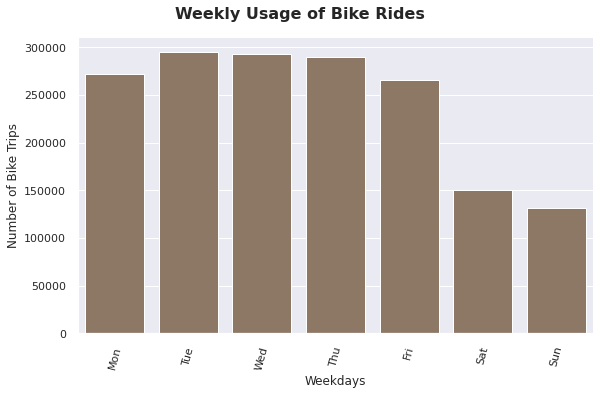

In [41]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

wu = sb.catplot(data=gobike_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday, aspect=1.7)

wu.set_axis_labels('Weekdays', 'Number of Bike Trips')

wu.fig.suptitle('Weekly Usage of Bike Rides', y=1.05, fontsize=16, fontweight='bold');

wu.set_xticklabels(rotation=75);



## Observation 1
The busiest day of the week is Tuesday with almost 300,000 trips, closely followed by wednesday and thursday. and no surprises that saturday and sunday are the least as there would be less people going to work on these days.It is safe to imply that the bikes are mainly used to go to work, which explains the massive drop in usage on weekends.

## Question 2: What is the monthly usage of bike rides?

### Visualization

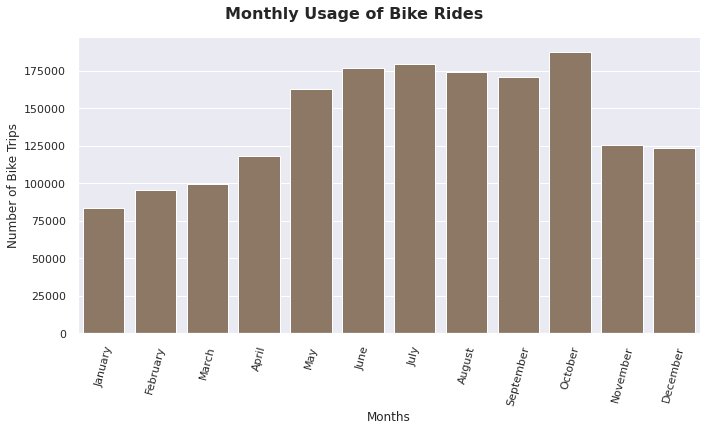

In [42]:
# Monthly usage of the Ford Go bike system
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mu = sb.catplot(data=gobike_clean, x='start_time_month', kind='count', color = base_color,order=months,  aspect =2.0)

mu.set_axis_labels('Months', 'Number of Bike Trips')

mu.fig.suptitle('Monthly Usage of Bike Rides', y=1.05, fontsize=16, fontweight='bold');

mu.set_xticklabels(rotation=75);

### Observation 2:
The month with th least usage is January, considering winter, it's not too surprsing, and we can see a massive leap in the usage from May and ultimately peaking in October.

### Question 3: What is the hourly usage of Bike Usage

### Visualization

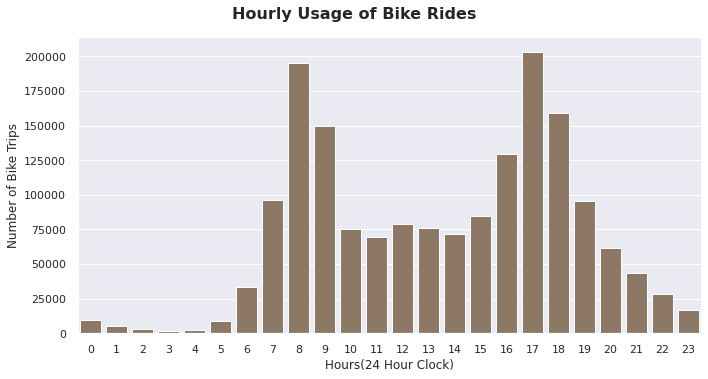

In [43]:
hu = sb.catplot(data=gobike_clean, x='start_time_hour', kind='count', color=base_color, aspect = 2.0)
hu.set_axis_labels('Hours(24 Hour Clock)', 'Number of Bike Trips')
hu.fig.suptitle('Hourly Usage of Bike Rides', y=1.05, fontsize=16, fontweight='bold');


### Observation 3:
The bike usage peaks at both 8am and 5pm, which hammers further on the point that customers may mainly be of the working class.

### Question 4: What percentage of users are casual users and subscribers?

### Visualization

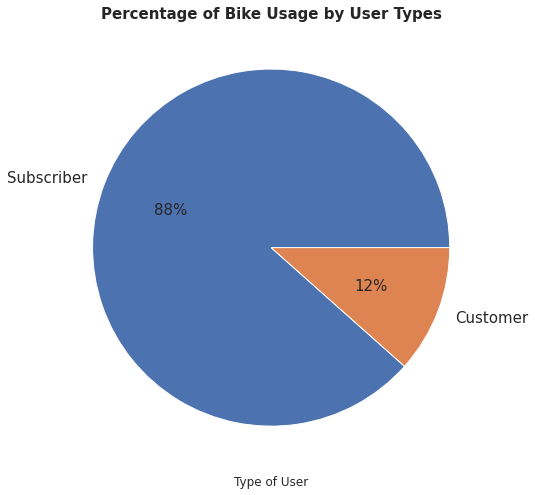

In [44]:
gobike_clean.user_type.value_counts().plot(kind='pie',figsize=(8,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Type of User')
ax.set_title("Percentage of Bike Usage by User Types", fontsize=15, fontweight='bold');

### Observation 4:
The pie chart shows that majority of the users, 88% specifically, make up most of the users.

### Question 5: What age category uses the bikes the most?

### Visualization

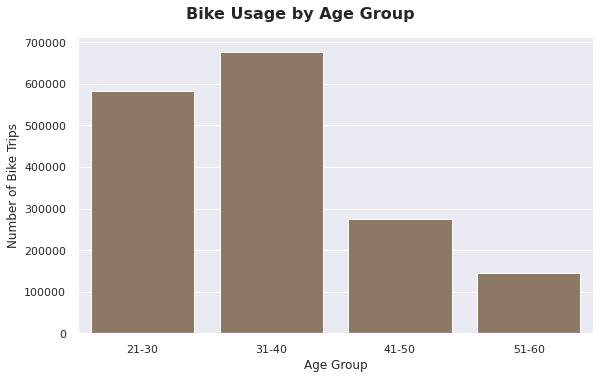

In [45]:
age_order =['21-30', '31-40', '41-50', '51-60']

wu = sb.catplot(data=gobike_clean, x='age_category',order=age_order, kind='count', color = base_color, aspect=1.7)

wu.set_axis_labels('Age Group', 'Number of Bike Trips')

wu.fig.suptitle('Bike Usage by Age Group', y=1.05, fontsize=16, fontweight='bold');

The mest frequent users of the bike service are between 21 and 40, that tallies with the age of working class adults.

### Question 6: What is the bike system usage by Gender

### Visualization

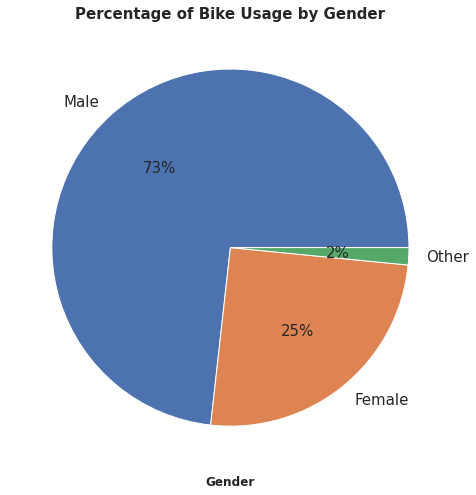

In [46]:
gobike_clean.member_gender.value_counts().plot(kind='pie', figsize=(8,10),fontsize =15, autopct='%1.0f%%')

ax = plt.gca()
ax.set_ylabel('')
ax.set_xlabel('Gender', fontweight='bold')
ax.set_title("Percentage of Bike Usage by Gender", fontsize=15, fontweight='bold');

### Observation 6: From the pie chart above, we can tell that majority of the users are Men.

### Question 7: What is the duration of the Bike Trips?

### Visualization

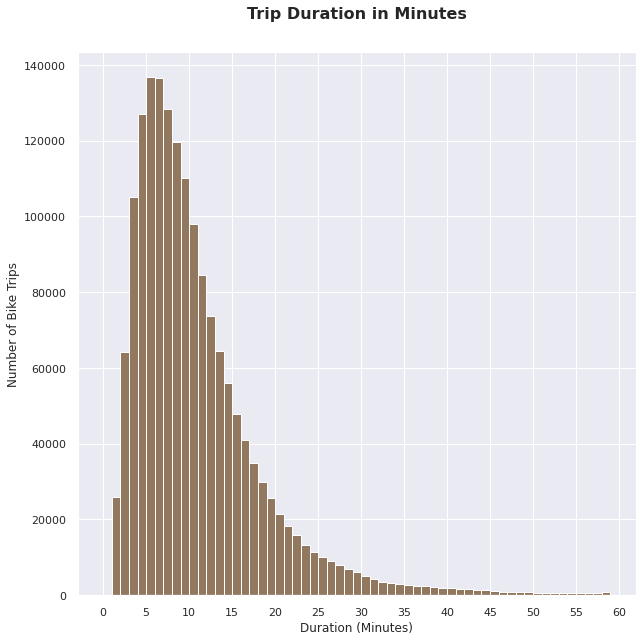

In [47]:
plt.figure(figsize=(10,10))
bin_edges = np.arange(0, 60, 1)
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
sb.distplot(gobike_clean['duration_minute'], bins = bin_edges, color=base_color, kde = False, hist_kws = {'alpha' : 1});
plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)')
plt.xticks(ticks, ticks)
plt.ylabel('Number of Bike Trips');

### Observation 7
The histogram shows that most of the trips were short trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Fortunately, considering how tidy the dataset was even before cleaning. there was barely any unusual point so I did not need to perform any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only unusual point which was dealt with was in the age column where the maximum was 141, after it was looked into,
  I also added a couple of columns to enable me gain further insights on the data and also to check for the relationship between variables.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data, mainly variables that were introduced in the previous section (univariate exploration).

 ### Question 1: What are the customer and subscriber bike usage by Duration?

### Visualization

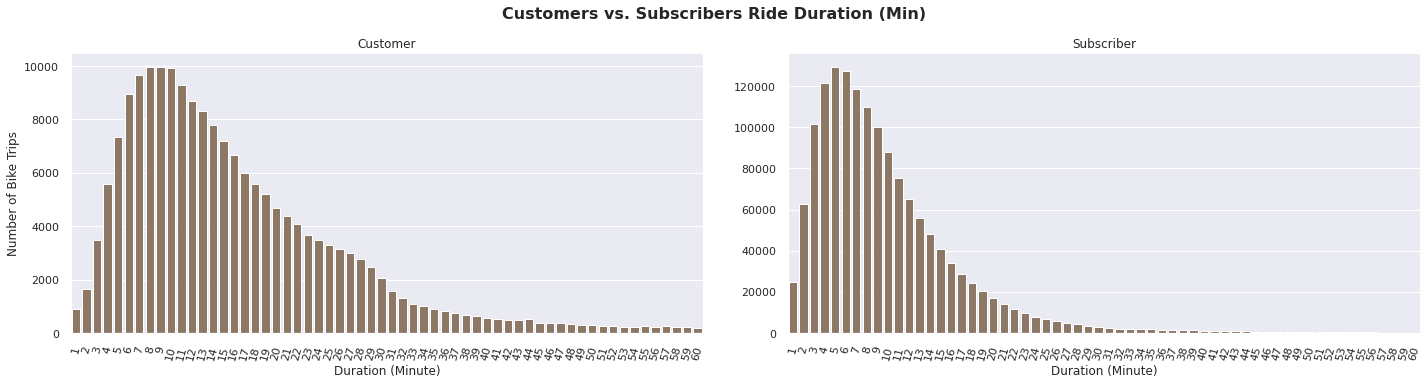

In [48]:
data = gobike_clean.query('duration_minute <= 60')

user_dur = sb.catplot(data=data, x = 'duration_minute', col='user_type', kind='count', sharey = False, color = base_color, height=5, aspect=2);

user_dur.set_axis_labels('Duration (Minute)', 'Number of Bike Trips')
user_dur.set_titles('{col_name}')

user_dur.fig.suptitle('Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
user_dur.set_xticklabels(rotation=75);

To make the visualization tidier, I will use trips of at least 30 minutes since it has been established that most trips are short trips and for a better view of the min and max values, i will use a box plot instead.

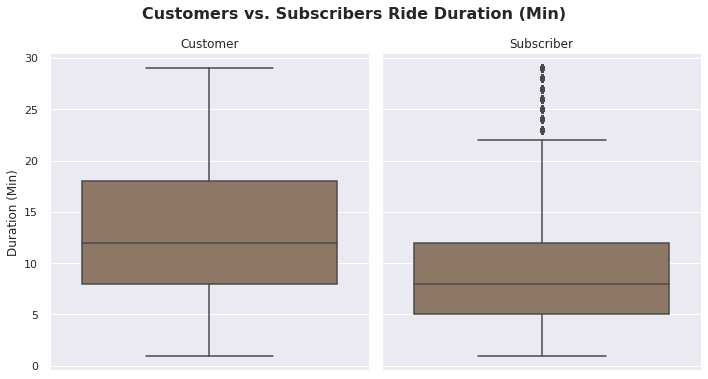

In [49]:
data = gobike_clean.query('duration_minute < 30')

g = sb.catplot(data=data, y='duration_minute', col="user_type", kind='box', color = base_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');

### Observation 1:
From the box plots above, i can see that customer trips range from 8-18 minutes while subscribers have shorter commutes which range from 5-12 minutes.

### Question 2: What is the weekly trend of usage by Customers and Subscribers?

### Visualization

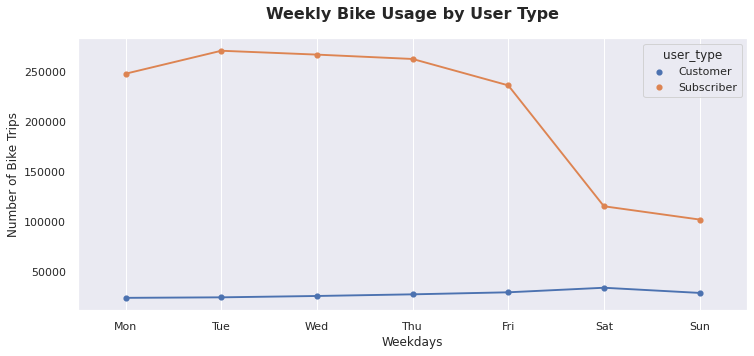

In [50]:
plt.figure(figsize=(12, 5))

gobike_clean_user_week = gobike_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=gobike_clean_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Weekly Bike Usage by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

### Observation 2:
Subscribers use the bikes mainly on weekdays then there's  dip in usage on weekends, while customers have a low usage all through the week with a very slight increase on weekends.

### Question 3: What is the usage rate of the bikes by age group of gender?

### Visualization

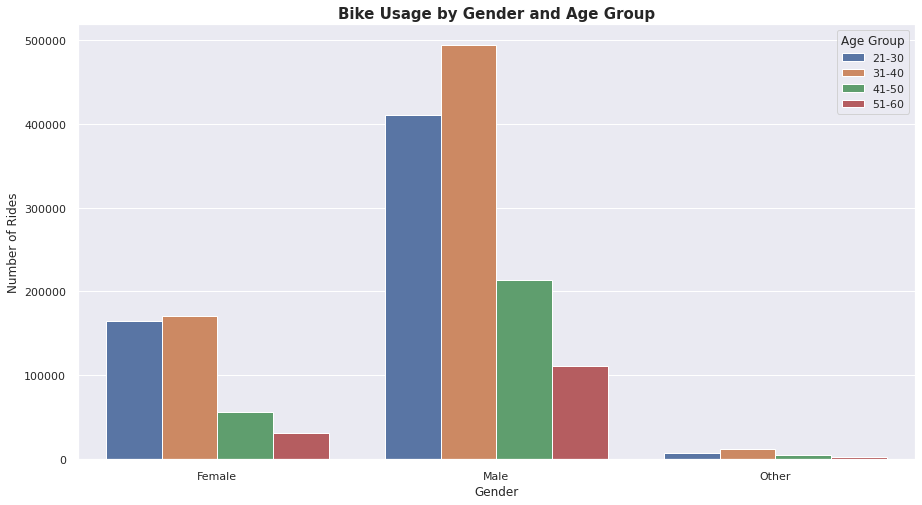

In [51]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
age_order =['21-30', '31-40', '41-50', '51-60']
ax = sb.countplot(x='member_gender', hue='age_category', hue_order=age_order,data=gobike_clean[gobike_clean['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])])

ax.legend().set_title('Age Group')
ax.set_ylabel('Number of Rides')
ax.set_xlabel('Gender')
ax.set_title("Bike Usage by Gender and Age Group",fontweight='bold' ,fontsize=15);


### Observation 3: 
The age range of majority of the users falls under 21-40, we can also tell that mjority of the users are male. Over 40,000 men in the 21-30 age group use the bikes and 48,000 for the 31-40 range compared to the 16,000 and 17,000 respectively for women.


### Question 4: What is the usage rate of the bike system among users by age group of customers and subscribers?

### Visualization

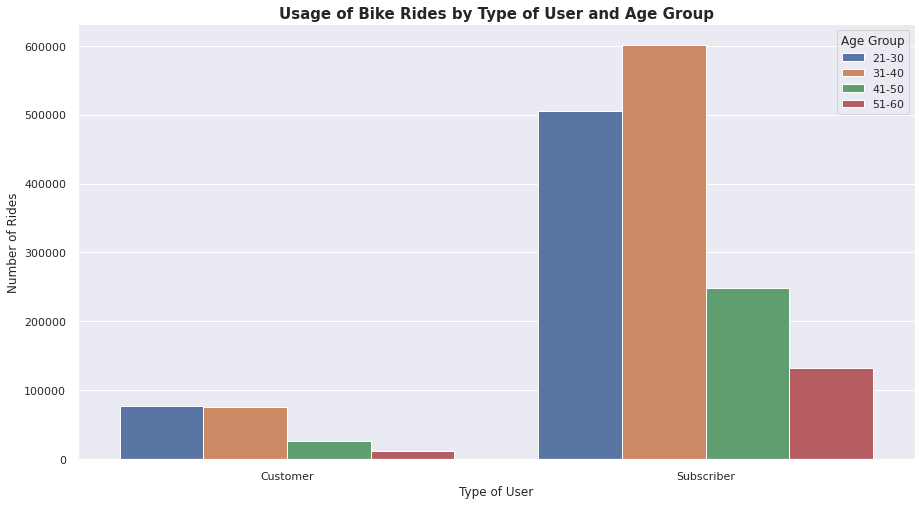

In [52]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
age_order =['21-30', '31-40', '41-50', '51-60']
ax = sb.countplot(x='user_type', hue='age_category', hue_order=age_order,data=gobike_clean[gobike_clean['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])])

ax.legend().set_title('Age Group')
ax.set_ylabel('Number of Rides')
ax.set_xlabel('Type of User')
ax.set_title("Usage of Bike Rides by Type of User and Age Group",fontweight='bold' ,fontsize=15);

### Observation 4:
From the graph above, we can see that most of the subscribers are in the 31-40 age range, closely followed by the 21-30 age range, which tallies with both the student and working age population.

### Question 5: Monthly usage of Customers and Subscribers?

### Visualization

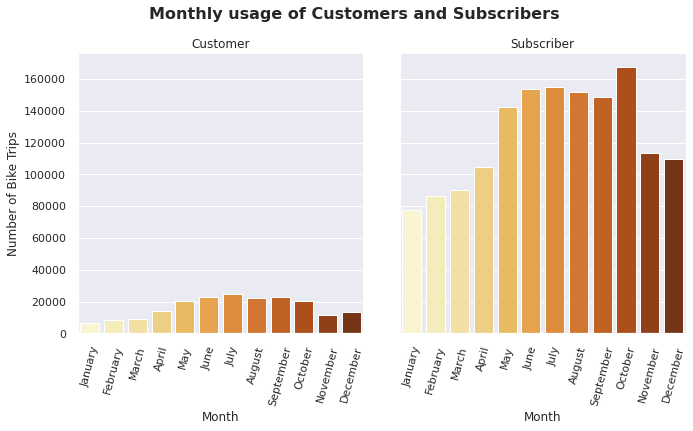

In [53]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
graph = sb.catplot(data=gobike_clean, x='start_time_month',order=months, col="user_type", kind='count',palette="YlOrBr", sharey = True);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Monthly usage of Customers and Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

### Observation 5:
Monthly usage for customers peaks in July with a little over 20,000 trips, while there is a steady increase in the number of bike trips from April and it peaks in October with over 160,000 trips for Subscribers.

### Questuin 6: What is the hourly usage of bike rides among gender in the dataset?

### Visualization

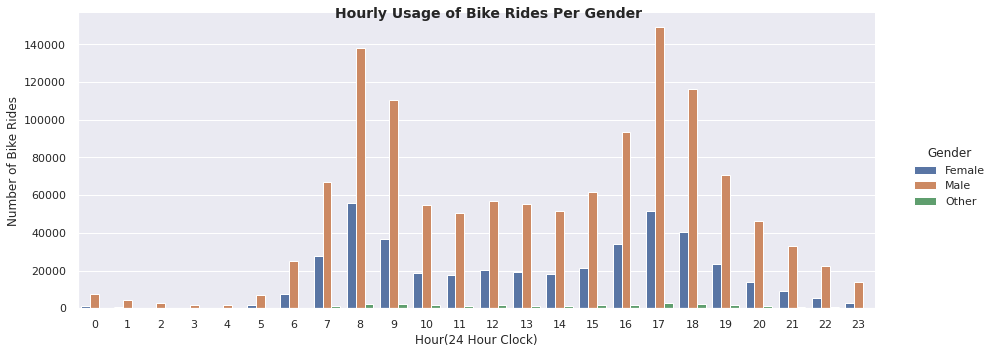

In [54]:
hu = sb.catplot(data=gobike_clean, x='start_time_hour', hue='member_gender', kind='count',aspect=20.7/8.27)

hu.set_axis_labels('Hour(24 Hour Clock)', 'Number of Bike Rides')
hu._legend.set_title('Gender')
hu.fig.suptitle('Hourly Usage of Bike Rides Per Gender',fontweight='bold', fontsize=14);

### Observation 6
The peak hours for both men and women are 8am and 5pm, which further suggests majority of the users are either students or of the working class.

### Question 7: What is the hourly usage by Age Group?

### Visualization

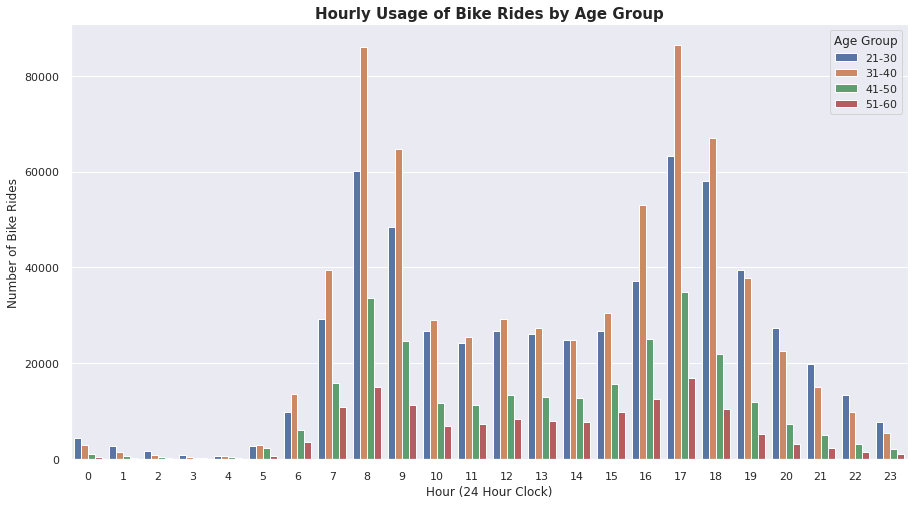

In [55]:
age_order =['21-30', '31-40', '41-50', '51-60']
ax = sb.countplot(x='start_time_hour', hue='age_category', hue_order=age_order,data=gobike_clean[gobike_clean['age_category'].isin(['21-30', '31-40', '41-50', '51-60'])])

ax.legend().set_title('Age Group')
ax.set_ylabel('Number of Bike Rides')
ax.set_xlabel('Hour (24 Hour Clock)')
ax.set_title("Hourly Usage of Bike Rides by Age Group",fontweight='bold', fontsize=15);

### Observation 7
No surprises here, the most active age groups(21-30 and 31-40) both have peaks at 8am and 5pm

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For the user types, I discovered that customers mainly used the bike service on weekends while subscribers mainly used the service on weekdays.
Monthly usage peaked in july for customers and in october for subscribers.
The main age groups which used the bike service the most are the 21-30 and 31-40 age groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customer trips on average were longer than subscriber trips.

## Multivariate Exploration

> In this section i will be investigating relationships between 3 or more variables. 


### Question 1: What is the monthly usage of rides per user type by gender?

### Visualization

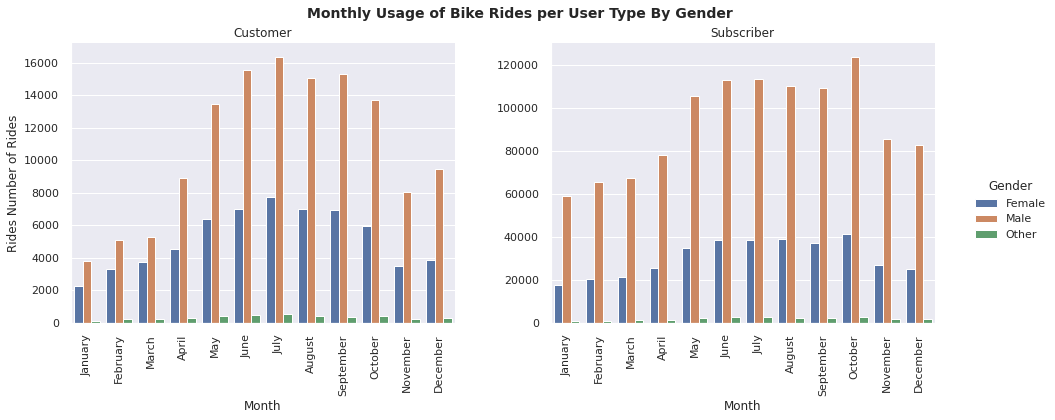

In [56]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ug = sb.catplot(data=gobike_clean, x='start_time_month', col="user_type",order=months, hue='member_gender', kind='count', aspect=20/15,sharey=False)

ug.set_axis_labels('Month', 'Rides Number of Rides')
ug.set_xticklabels(rotation=90)
ug._legend.set_title('Gender')
ug.set_titles('{col_name}')
ug.fig.suptitle('Monthly Usage of Bike Rides per User Type By Gender',fontweight='bold' ,fontsize=14, y=1.02);

### Observation 1:
Increased demand for customers starts from April and peaks at July with most demands from male customers.
Subscriber demands peaks in October and there are also more male than female subscribers.

### Question 2: What is the weekly number of bike trips based on Subscribers and Customers age group?

### Visualization

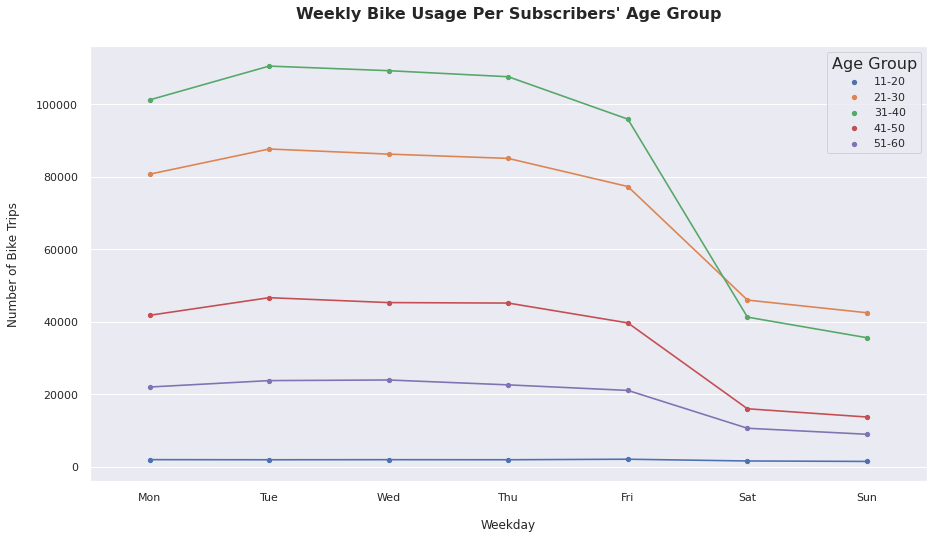

In [57]:
# create a dataframe for subscribers_age and group by
subscriber_age = gobike_clean[gobike_clean['user_type'] == 'Subscriber'].groupby(['start_time_weekday', 'age_category']).agg({'bike_id':'count'}).reset_index()

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data = subscriber_age, x='start_time_weekday', y='bike_id', hue='age_category', scale=.6, order = weekday, height=5, aspect=2);

plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Weekly Bike Usage Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');


leg = ax.legend()
leg.set_title('Age Group', prop={'size': 16})

plt.show()



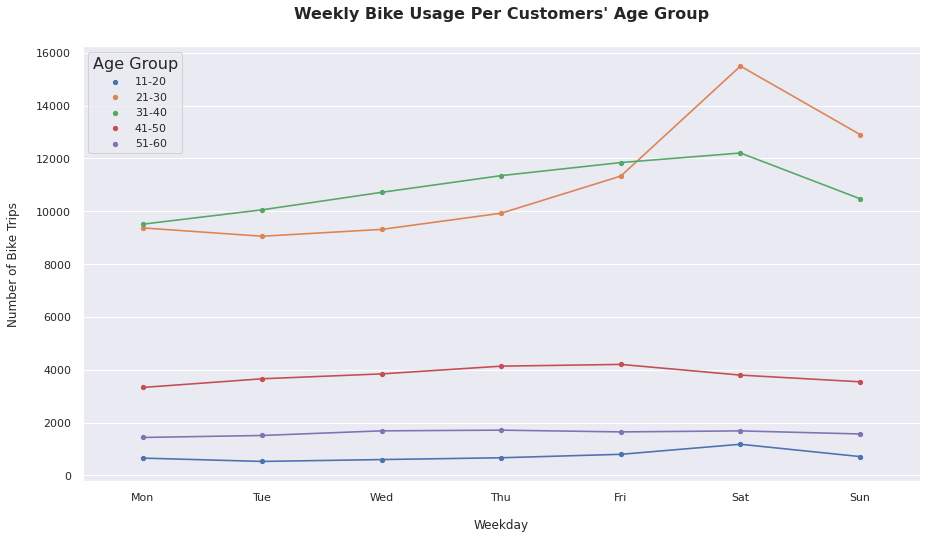

In [58]:
# create a dataframe for customer_age and group by weekday
customer_age = gobike_clean[gobike_clean['user_type']== 'Customer'].groupby(['start_time_weekday', 'age_category']).agg({'bike_id':'count'}).reset_index()
ax = sb.pointplot(data = customer_age, x='start_time_weekday', y='bike_id', hue='age_category', scale=.6, order = weekday, height=5, aspect=2);

plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Weekly Bike Usage Per Customers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');


leg = ax.legend()
leg.set_title('Age Group', prop={'size': 16})

plt.show()

### Observation 2: 
As seen in both univariate and bivariate exploration, subscribers are mostly active on weekdays, the age groups which are most active range from 21-40, which consists mainly of students and the working class population.
Customers are mainly active on weekends and the same agr groups as in subscribers are the most active.

### Question 3: What is the trip duration of each gender among the user types?

### Visualization

In [59]:
# since we have established most trips are short trips, the final plot will be on trip durations <= 25 minutes
gobike_clean.drop(gobike_clean[gobike_clean.duration_minute > 25].index, inplace=True)

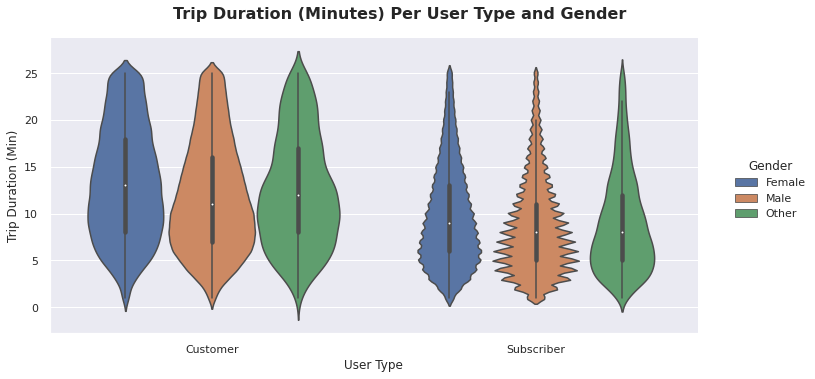

In [60]:
d_ug = sb.catplot(data=gobike_clean, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=5, aspect=2);

d_ug.set_axis_labels("User Type", "Trip Duration (Min)")
d_ug._legend.set_title('Gender')
d_ug.fig.suptitle('Trip Duration (Minutes) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

### Observation 3:
In both user types we can see that females take longer trips compared to Males and others.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This section essentially amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables. Subscriber vs Customer age was expanded upon through the use of age groups, and a pointplot to demonstrate the weekly usage of each age group among subscribers and customers.

### Were there any interesting or surprising interactions between features?

> Yes, it was quite interesting that customers spent more time than subscribers.

## Conclusions
There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of users. Subscribers used the system heavily on work days concentrated around 8-9am and 5-6pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tend to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient. Age is also a factor within user type, subscribers who fall in the age group of 21-40 years old are the most common age group to use the bike sharing system. The 21-40 year olds also led the spike which occured across all age groups in October.


## Sources

- [Dropping all rows with at least one missing value](https://towardsdatascience.com/how-to-drop-rows-in-pandas-dataframes-with-nan-values-in-certain-columns-7613ad1a7f25#:~:text=Drop%20all%20rows%20having%20at%20least%20one%20null%20value&text=DataFrame.,at%20least%20one%20missing%20value.)

- [Hyperlinked Table of Contents](https://medium.com/@sambozek/ipython-er-jupyter-table-of-contents-69bb72cf39d3)

- [Markdown Cheat Sheet](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)

- [dt.strftime function](https://www.w3resource.com/pandas/series/series-dt-strftime.php)

- [How to use Haversine in python](https://www.adamsmith.haus/python/answers/how-to-find-the-distance-between-two-lat-long-coordinates-in-python)

- [Automatic sorting for categorical columns](https://soulsinporto.medium.com/custom-sort-a-pandas-dataframe-with-pd-categorical-c4eec8343957)

- [gca in matplotlib](https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/)